In [1]:
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization

In [2]:
df = pd.read_csv('/kaggle/input/nchs-infant-and-neonatal-mortality-rates/uz.csv')
df

,Type,Year,Mortality Rate
0,Neonatal,1915,44.4
1,Neonatal,1916,44.1
2,Neonatal,1917,43.4
3,Neonatal,1918,44.2
4,Neonatal,1919,41.5
...,...,...,...
193,Neonatal,2011,4.1
194,Infant,2006,6.7
195,Neonatal,2010,4.0
196,Infant,2013,6.0


In [3]:
df.head(10)

,Type,Year,Mortality Rate
0,Neonatal,1915,44.4
1,Neonatal,1916,44.1
2,Neonatal,1917,43.4
3,Neonatal,1918,44.2
4,Neonatal,1919,41.5
5,Neonatal,1920,41.5
6,Neonatal,1921,39.7
7,Neonatal,1922,39.7
8,Neonatal,1923,39.5
9,Neonatal,1924,38.6


In [4]:
df.tail(5)

,Type,Year,Mortality Rate
193,Neonatal,2011,4.1
194,Infant,2006,6.7
195,Neonatal,2010,4.0
196,Infant,2013,6.0
197,Neonatal,2012,4.0


In [5]:
df.shape

(198, 3)

In [6]:
df.isnull().sum()

Type              0
Year              0
Mortality Rate    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            198 non-null    object 
 1   Year            198 non-null    int64  
 2   Mortality Rate  198 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [8]:
df.describe()

,Year,Mortality Rate
count,198.00000,198.000000
mean,1964.00000,25.085354
std,28.64982,21.618767
min,1915.00000,4.000000
25%,1939.25000,7.625000
50%,1964.00000,19.100000
75%,1988.75000,33.950000
max,2013.00000,101.000000


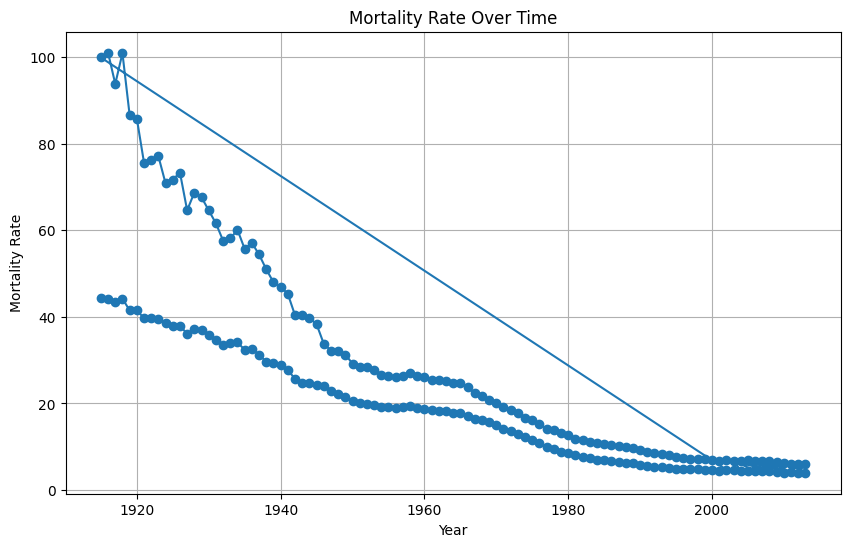

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Mortality Rate'], marker='o')
plt.title('Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.show()

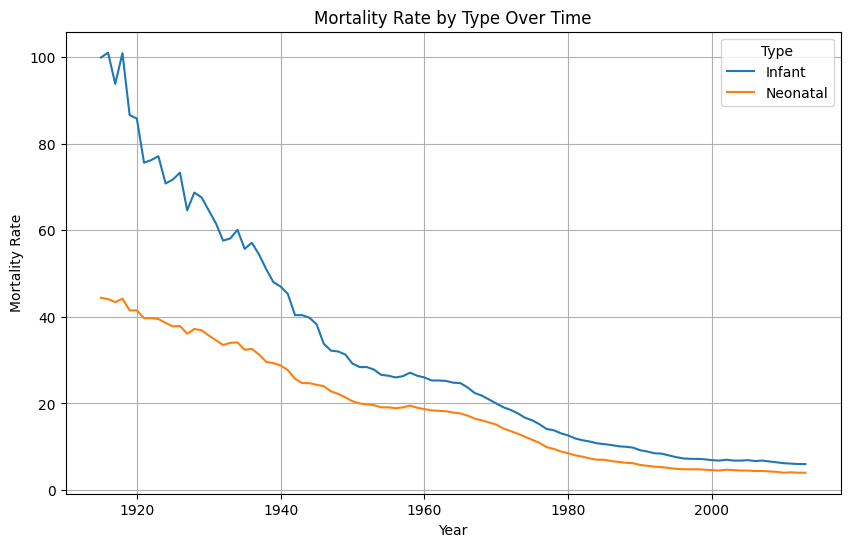

In [10]:
# Grouping data by 'Year' and 'Type'
grouped_data = df.groupby(['Year', 'Type'])['Mortality Rate'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
for col in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[col], label=col)

plt.title('Mortality Rate by Type Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend(title='Type')
plt.grid(True)
plt.show()


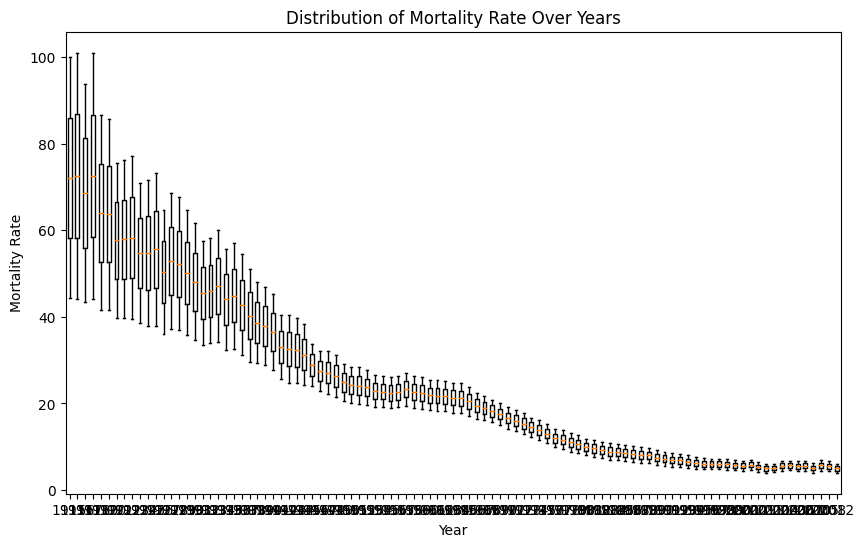

In [11]:
plt.figure(figsize=(10, 6))
years = df['Year'].unique()
data = [df[df['Year'] == year]['Mortality Rate'] for year in years]
plt.boxplot(data, labels=years)
plt.title('Distribution of Mortality Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()

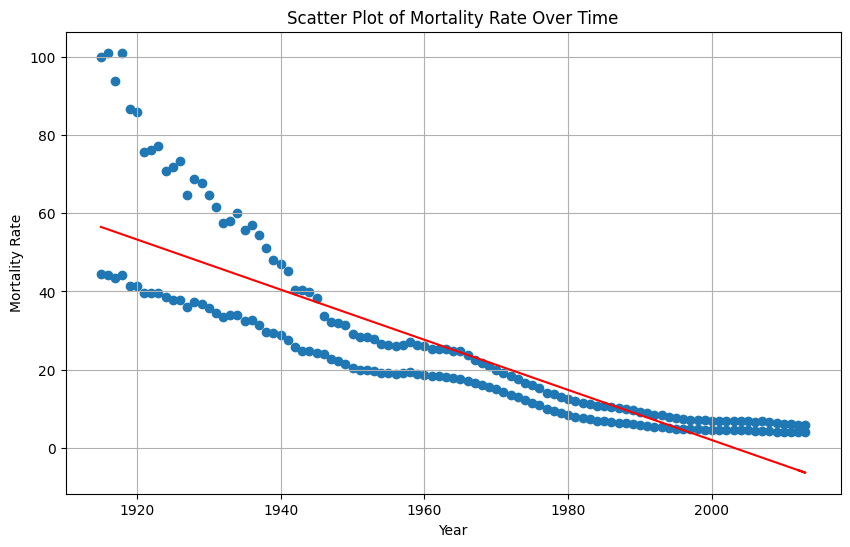

In [12]:
plt.figure(figsize=(10, 6))
x = df['Year']
y = df['Mortality Rate']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.title('Scatter Plot of Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.show()

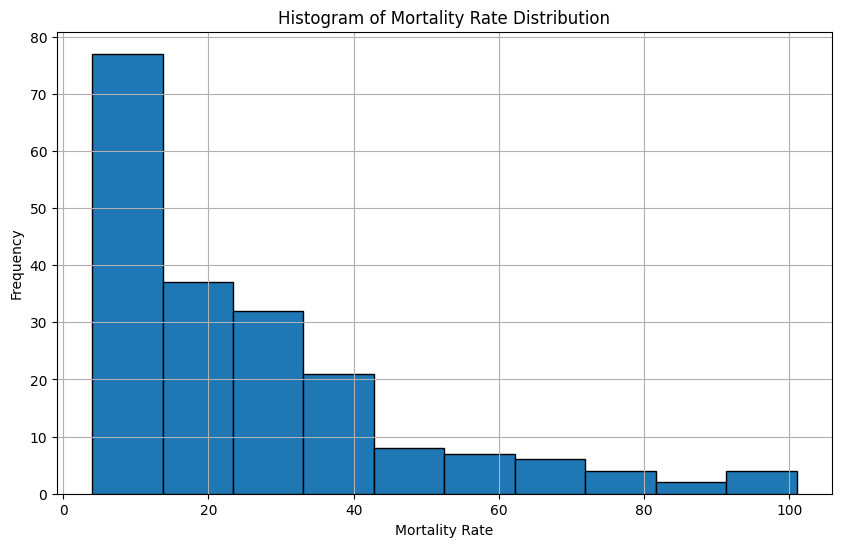

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Mortality Rate'], bins=10, edgecolor='black')
plt.title('Histogram of Mortality Rate Distribution')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()